In [1]:
from bcnf.simulation.video_processing import process_video
from bcnf.utils import get_dir
from bcnf.simulation.coordinate_conversion import GPS_to_coordinate_system

import matplotlib.pyplot as plt
import numpy as np
import pickle
import os


In [2]:
# SMALL HANDBALL
name = 'Small_Handball'
path_nikita = 'Small_Nikita_Handball'
path_paul = 'Small_Paul_Handball'

cam_nikita = np.array([49.38663642, 8.68427435])
cam_paul = np.array([49.38670663, 8.68434757])
midpoint = np.array([49.38666094, 8.68433693])

initial_point = np.array([49.38663564, 8.68442560])
initial_height = 1.90  # meters
point_of_impact = np.array([49.38667337, 8.68430265])

cam_height_nikita = 0.60  # meters
cam_height_paul = 0.43

cam_angle_nikita = 11  # degrees
cam_angle_paul = 28

m = 0.325 # kg

r = 0.084 # m
A = np.pi * r**2  # m^2

Cd = 0.47

rho = 1.22  # kg/m^3

b = A * rho * Cd

g = -9.81  # m/s^2

#######

threshold1_Nikita = 50
threshold2_Nikita = 200

threshold1_Paul = 25
threshold2_Paul = 50

In [2]:
# SMALL WASSERBALL
name = 'Small_Wasserball'
path_nikita = 'Small_Nikita_Wasserball'
path_paul = 'Small_Paul_Wasserball'

cam_nikita = np.array([49.38663642, 8.68427435])
cam_paul = np.array([49.38670663, 8.68434757])
midpoint = np.array([49.38666094, 8.68433693])

initial_point = np.array([49.38658580, 8.68429559])
initial_height = 1.95  # meters
point_of_impact = np.array([49.38670290, 8.68434757])

cam_height_nikita = 0.60  # meters
cam_height_paul = 0.43

cam_angle_nikita = 11  # degrees
cam_angle_paul = 28

m = 0.053 # kg

r = 0.132 # m
A = np.pi * r**2  # m^2

Cd = 0.47

rho = 1.22  # kg/m^3

b = A * rho * Cd

g = -9.81  # m/s^2

#######

threshold1_Nikita = 50
threshold2_Nikita = 200

threshold1_Paul = 30
threshold2_Paul = 50

In [2]:
# SMALL LUFTBALLON
name = 'Small_Luftballon'
path_nikita = 'Small_Nikita_Luftballon'
path_paul = 'Small_Paul_Luftballon'

cam_nikita = np.array([49.38663642, 8.68427435])
cam_paul = np.array([49.38670663, 8.68434757])
midpoint = np.array([49.38666094, 8.68433693])

initial_point = np.array([49.38665593, 8.68437351])
initial_height = 1.90  # meters
point_of_impact = np.array([49.38670744, 8.68432925])

cam_height_nikita = 0.60  # meters
cam_height_paul = 0.43

cam_angle_nikita = 11  # degrees
cam_angle_paul = 28

m = 0.002 # kg

r = 0.057 # m
A = np.pi * r**2  # m^2

Cd = 0.47

rho = 1.22  # kg/m^3

b = A * rho * Cd

g = -9.81  # m/s^2

#######

threshold1_Nikita = 50
threshold2_Nikita = 100

threshold1_Paul = 9
threshold2_Paul = 20

MovieWriter imagemagick unavailable; using Pillow instead.


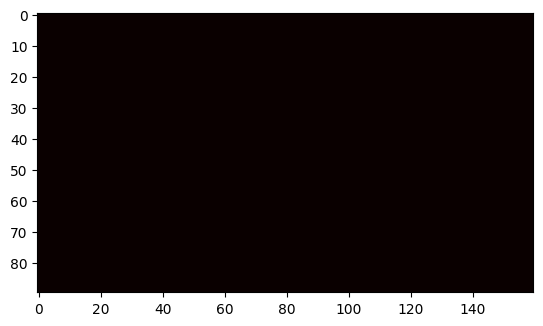

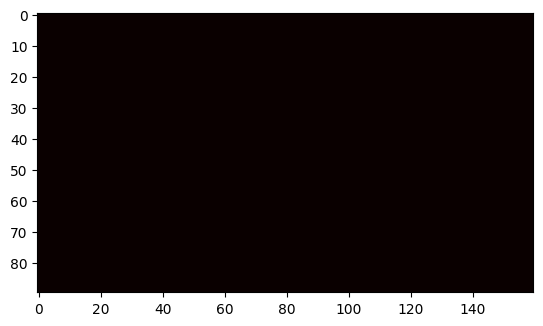

In [3]:
frames_Nikita = process_video(get_dir('data', 'bcnf-data', 'Videos', name, f'{path_nikita}.mp4'),
                       get_dir('data', 'bcnf-data', 'Videos', name,),
                       path_nikita,
                       True,
                       True,
                       (16, 9),
                       threshold1_Nikita,
                       threshold2_Nikita)

plt.imshow(frames_Nikita[0], cmap='hot')
plt.show()

plt.imshow(frames_Nikita[-1], cmap='hot')
plt.show()
                    

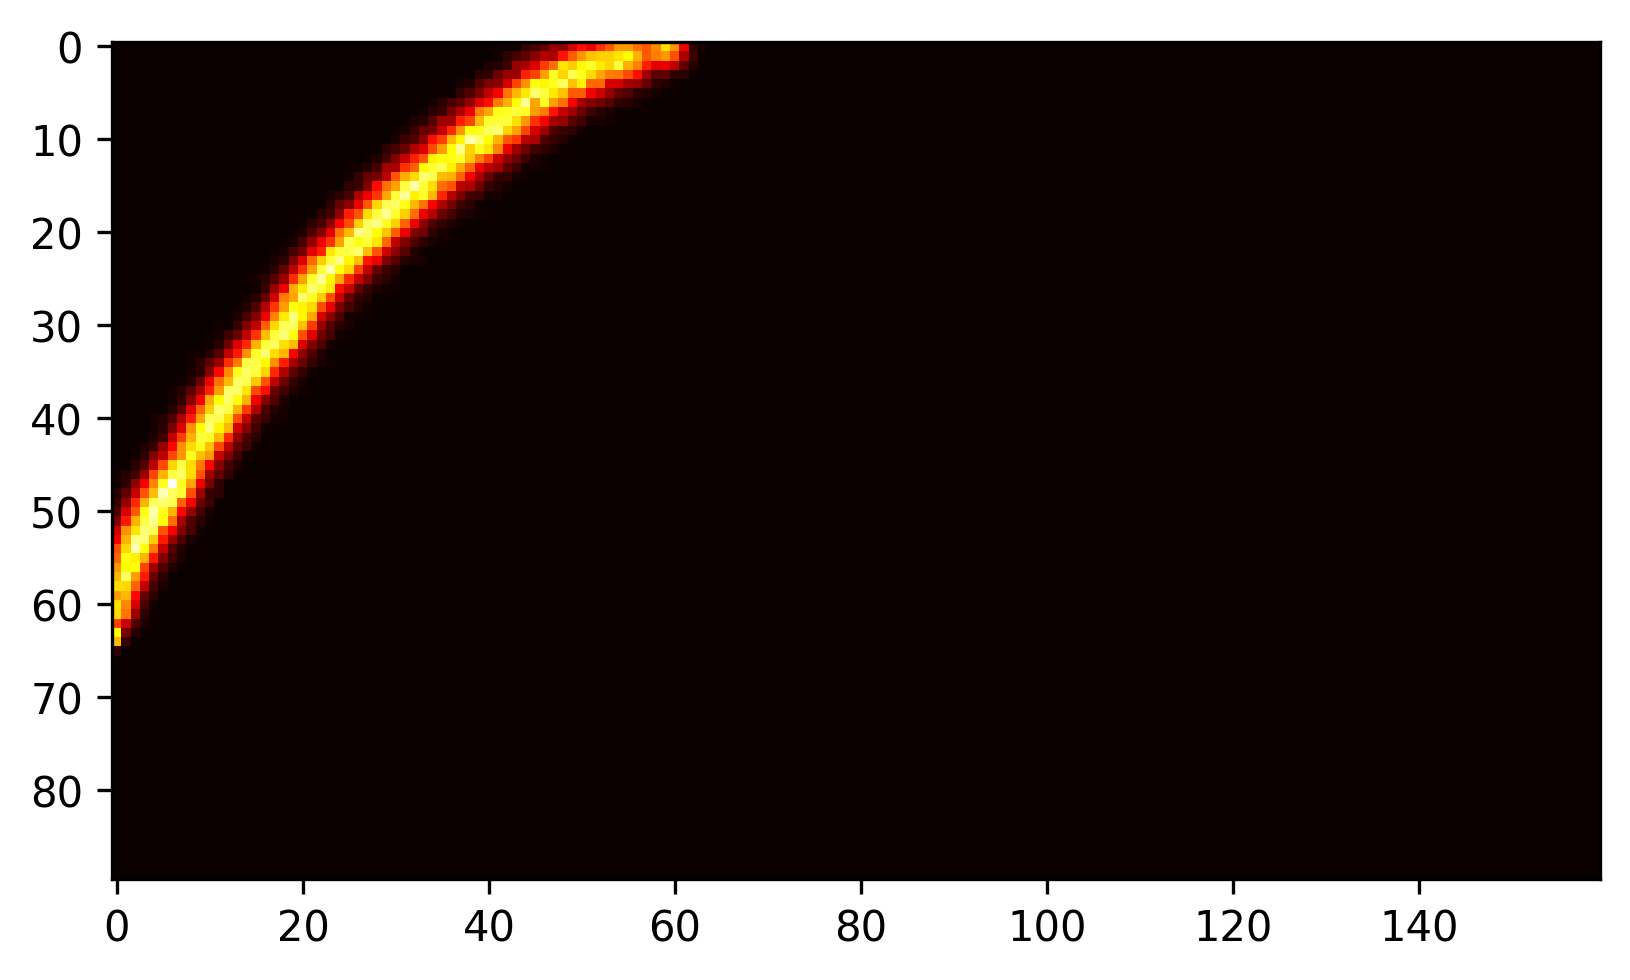

In [4]:
frames_Nikita = np.array(frames_Nikita)
normalized_frames_Nikita = (frames_Nikita - frames_Nikita.min(axis=(1, 2))[:, None, None]) / (1e-9 + frames_Nikita.max(axis=(1, 2)) - frames_Nikita.min(axis=(1, 2)))[:, None, None]

fig, ax = plt.subplots(dpi=300)
ax.imshow(np.array(normalized_frames_Nikita).sum(0), cmap='hot')

plt.savefig(get_dir('data', 'bcnf-data', 'Videos', name, f'{path_nikita}_tralala.png'))

MovieWriter imagemagick unavailable; using Pillow instead.


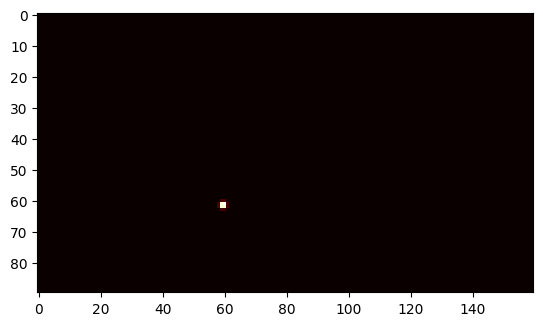

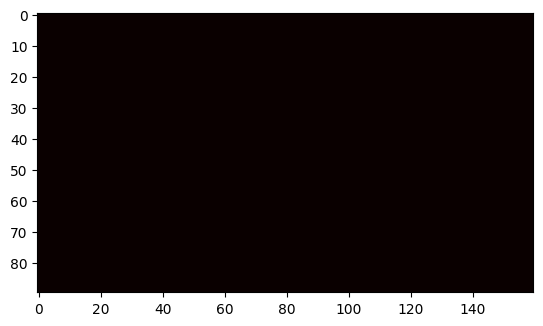

In [3]:
frames_Paul = process_video(get_dir('data', 'bcnf-data', 'Videos', name, f'{path_paul}.mp4'),
                       get_dir('data', 'bcnf-data', 'Videos', name),
                       path_paul,
                       True,
                       True,
                       (16, 9),
                       threshold1_Paul,
                       threshold2_Paul)

plt.imshow(frames_Paul[0], cmap='hot')
plt.show()

plt.imshow(frames_Paul[-1], cmap='hot')
plt.show()
                    

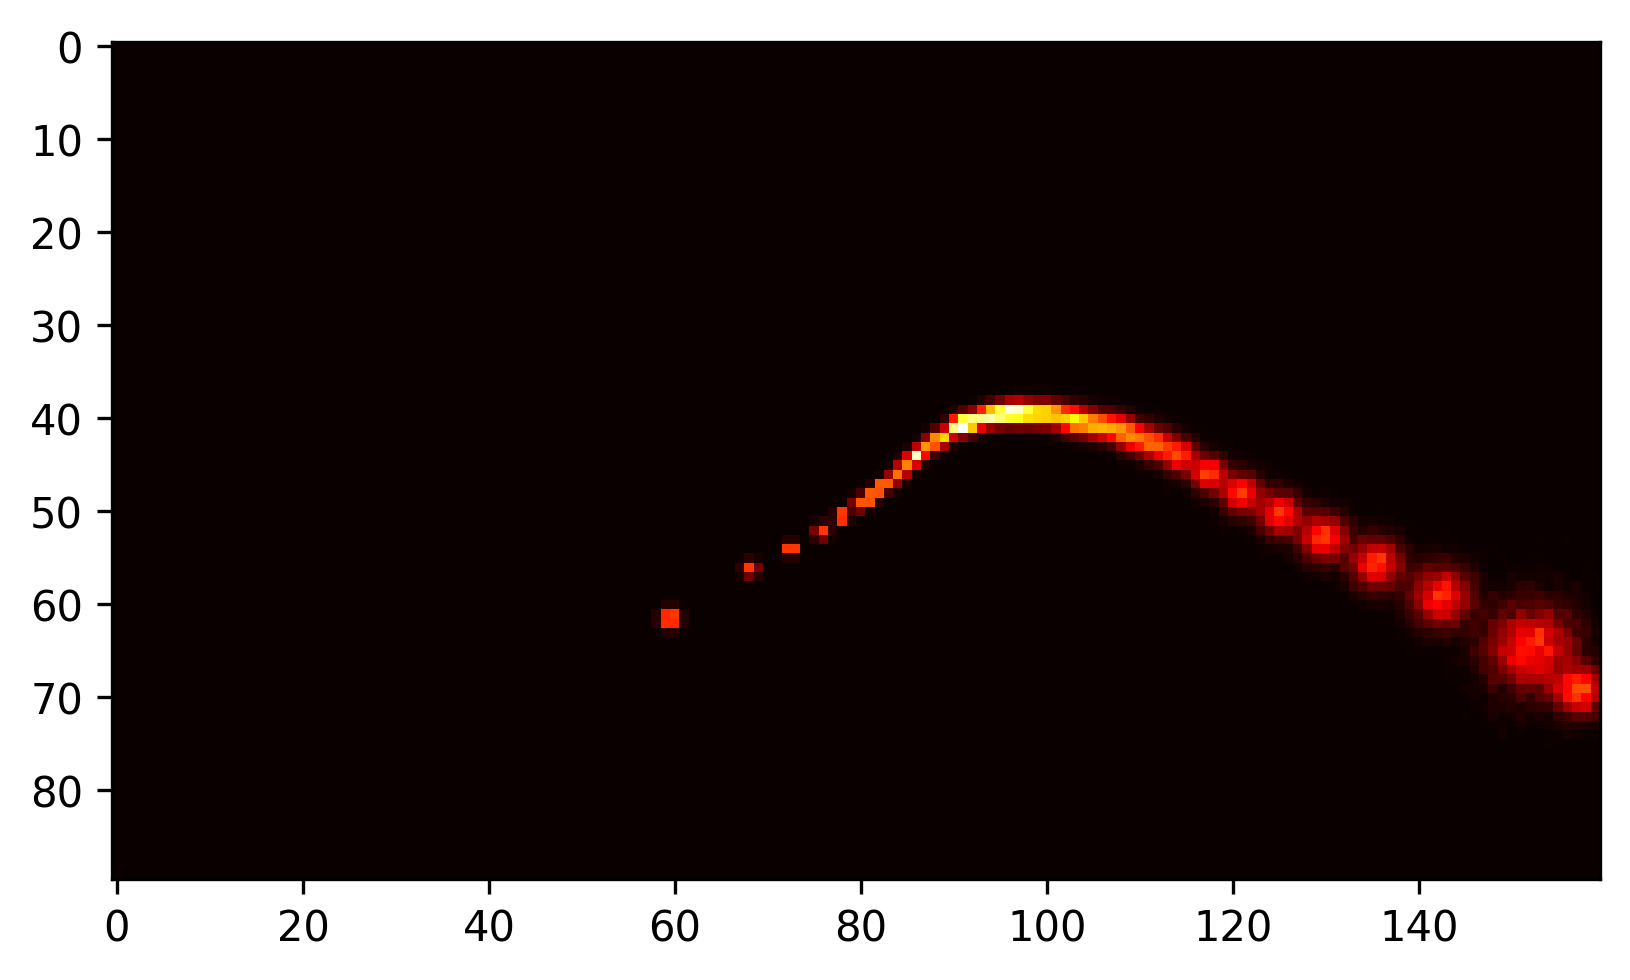

In [4]:
frames_Paul = np.array(frames_Paul)
normalized_frames_Paul = (frames_Paul - frames_Paul.min(axis=(1, 2))[:, None, None]) / (1e-9 + frames_Paul.max(axis=(1, 2)) - frames_Paul.min(axis=(1, 2)))[:, None, None]

fig, ax = plt.subplots(dpi=300)
ax.imshow(np.array(normalized_frames_Paul).sum(0), cmap='hot')

plt.savefig(get_dir('data', 'bcnf-data', 'Videos', name, f'{path_paul}_tralala.png'))

In [166]:
len(frames_Nikita), len(frames_Paul)

(49, 52)

In [167]:
REPLICATE_LAST_FRAME = False

if REPLICATE_LAST_FRAME:
    # replicate the last frame so each video has 60 frames
    frames_Nikita = np.concatenate([frames_Nikita, [frames_Nikita[-1]] * (60 - len(frames_Nikita))])
    frames_Paul = np.concatenate([frames_Paul, [frames_Paul[-1]] * (60 - len(frames_Paul))])
else:
    # add black frames so each video has 60 frames
    frames_Nikita = np.concatenate([frames_Nikita, [np.zeros_like(frames_Nikita[0])] * (60 - len(frames_Nikita))])
    frames_Paul = np.concatenate([frames_Paul, [np.zeros_like(frames_Paul[0])] * (60 - len(frames_Paul))])

In [168]:
len(frames_Nikita), len(frames_Paul)

(60, 60)

In [169]:
# take only every second frame to reduce the FPS to 15
frames_Nikita = frames_Nikita[::2]
frames_Paul = frames_Paul[::2]

MovieWriter imagemagick unavailable; using Pillow instead.


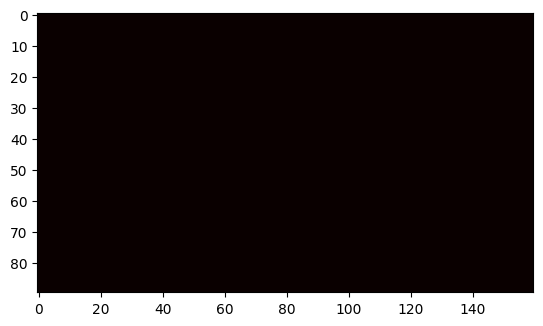

In [170]:
# make a gif of the frame

import matplotlib.animation as animation

fig = plt.figure()

ims = []
for i in range(len(frames_Nikita)):
    im = plt.imshow(frames_Nikita[i], animated=True, cmap='hot')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=1/15, blit=True, repeat_delay=1000)

ani.save(get_dir('data', 'bcnf-data', 'Videos', name, f'{path_nikita}_gmm_2s_15FPS.gif'), writer='imagemagick', fps=15)

MovieWriter imagemagick unavailable; using Pillow instead.


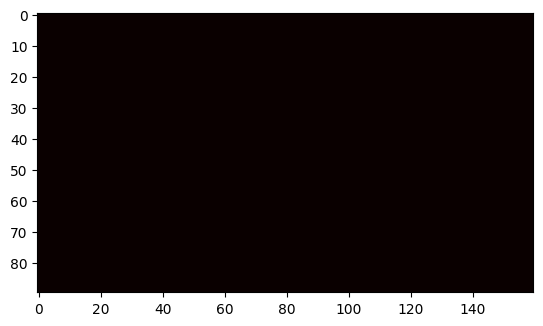

In [171]:
fig = plt.figure()

ims = []
for i in range(len(frames_Paul)):
    im = plt.imshow(frames_Paul[i], animated=True, cmap='hot')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=1/15, blit=True, repeat_delay=1000)

ani.save(get_dir('data', 'bcnf-data', 'videos', name, f'{path_paul}_gmm_2s_15FPS.gif'), writer='imagemagick', fps=15)

In [172]:
# coordinates
cam_nikita, cam_paul, midpoint, initial_point, point_of_impact = GPS_to_coordinate_system(cam_nikita, cam_paul, midpoint, initial_point, point_of_impact)

cam_radius = - cam_nikita[0]

cam_radian_nikita = 0.0

# calculate counterclockwise roational angle between cam_nikita and cam paul

cam_nikita_norm = cam_nikita / np.linalg.norm(cam_nikita)
cam_paul_norm = cam_paul / np.linalg.norm(cam_paul)

cos_angle = np.dot(cam_nikita_norm, cam_paul_norm)

angle = np.arccos(cos_angle)

cam_radian_paul = 2*np.pi - angle

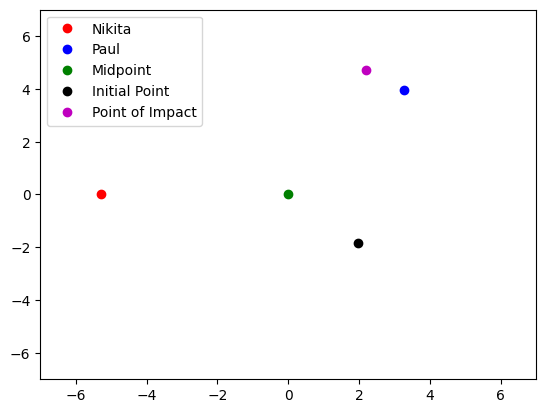

In [173]:
plt.plot(cam_nikita[0], cam_nikita[1], 'ro', label='Nikita')
plt.plot(cam_paul[0], cam_paul[1], 'bo', label='Paul')
plt.plot(midpoint[0], midpoint[1], 'go', label='Midpoint')
plt.plot(initial_point[0], initial_point[1], 'ko', label='Initial Point')
plt.plot(point_of_impact[0], point_of_impact[1], 'mo', label='Point of Impact')
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.legend()
plt.show()

In [174]:
data: dict[str, list] = {
    'cams': [frames_Nikita, frames_Paul],
    'cam_radian': [cam_radian_nikita, cam_radian_paul],
    'cam_radius': [cam_radius],
    'cam_angles': [cam_angle_nikita, cam_angle_paul],
    'cam_heights': [cam_height_nikita, cam_height_paul],
    'x0_x': [initial_point[0]],
    'x0_y': [initial_point[1]],
    'x0_z': [initial_height],
    'g': [g],
    'm': [m],
    'r': [r],
    'A': [A],
    'Cd': [Cd],
    'rho': [rho],
    'b': [b],
    'poi': [point_of_impact]
}

with open(os.path.join(get_dir('data', 'bcnf-data', 'videos', name, create=True), name + '.pkl'), 'wb') as f:
                pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [175]:
data

{'cams': [array([[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
 